<a href="https://colab.research.google.com/github/GaikwadChinmay/EDA-Case-Study-Bank-Loans/blob/main/EDA_Case_Study_UpGrad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  EDA Case Study


First, let's import all the dependancies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
print('Packages imported successfully')

Packages imported successfully


Now. let's import the data sets

In [2]:
data_app = pd.read_csv('/content/drive/MyDrive/Data Science/Data/application_data.csv')

In [3]:
# Shape of dataframe
data_app_rows, data_app_cols = data_app.shape

In [4]:
data_prev_app = pd.read_csv('/content/drive/MyDrive/Data Science/Data/previous_application.csv')

In [5]:
# Shape of dataframe
data_prv_app_rows, data_prv_app_cols = data_prev_app.shape

Lets find columns with missing values

In [6]:
 app_data_mis_vals = round(data_app.isnull().sum()/data_app_rows*100,2)

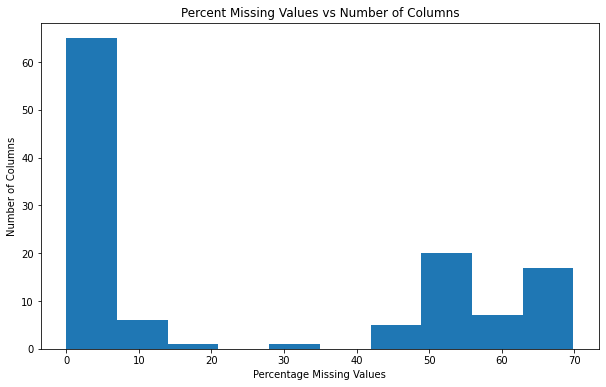

In [7]:
plt.figure(figsize=[10,6])
app_data_mis_vals.plot.hist().set(xlabel='Percentage Missing Values',ylabel='Number of Columns',title='Percent Missing Values vs Number of Columns')
plt.show()

From the above graph it is evident that there are many columns with missing values percentage more than 40%, since 40% is significant number for missing value we can drop these values.

In [8]:
#List of columns with missing values percentage greater than 40
drop_cols = app_data_mis_vals[app_data_mis_vals>40].index.tolist()

In [9]:
#Count of columns that need to be dropped
len(drop_cols)

49

In [10]:
#Dropping above columns
data_app.drop(labels=drop_cols,axis=1,inplace=True)

In [11]:
#Verifying the shape of the dataframe 
data_app.shape

(307511, 73)

In [12]:
#Lets get information obout the dataframe now
data_app.info(verbose=True,null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   SK_ID_CURR                   int64  
 1   TARGET                       int64  
 2   NAME_CONTRACT_TYPE           object 
 3   CODE_GENDER                  object 
 4   FLAG_OWN_CAR                 object 
 5   FLAG_OWN_REALTY              object 
 6   CNT_CHILDREN                 int64  
 7   AMT_INCOME_TOTAL             float64
 8   AMT_CREDIT                   float64
 9   AMT_ANNUITY                  float64
 10  AMT_GOODS_PRICE              float64
 11  NAME_TYPE_SUITE              object 
 12  NAME_INCOME_TYPE             object 
 13  NAME_EDUCATION_TYPE          object 
 14  NAME_FAMILY_STATUS           object 
 15  NAME_HOUSING_TYPE            object 
 16  REGION_POPULATION_RELATIVE   float64
 17  DAYS_BIRTH                   int64  
 18  DAYS_EMPLOYED                int64  
 19  DA

In [182]:
 impute_cols = data_app.isnull().sum()/data_app_rows*100

In [183]:
impute_cols_list = impute_cols[impute_cols>0].index.tolist()

In [184]:
impute_cols_list

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [16]:
null_data = data_app[data_app.isnull().any(axis=1)]

In [17]:
null_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,-3514,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,1,1,0,1,0,0,Laborers,1.0,2,2,THURSDAY,8,0,0,0,0,0,0,Electricity,0.746644,NaN,2.0,0.0,2.0,0.0,-1673.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307501,456245,0,Cash loans,F,N,Y,3,81000.0,269550.0,11871.0,225000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.009175,-12961,-1046,-1398.0,-3780,1,1,1,1,0,0,Low-skill Laborers,5.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Industry: type 1,0.575481,NaN,2.0,1.0,2.0,1.0,-448.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.022625,-16705,-7258,-9798.0,-259,1,1,0,1,0,0,Sales staff,1.0,2,2,WEDNESDAY,11,0,0,0,0,

In [18]:
data_app['EXT_SOURCE_3'].value_counts(normalize=True)

0.746300    0.005922
0.713631    0.005334
0.694093    0.005176
0.670652    0.004831
0.652897    0.004681
              ...   
0.018137    0.000004
0.017017    0.000004
0.858178    0.000004
0.018924    0.000004
0.024057    0.000004
Name: EXT_SOURCE_3, Length: 814, dtype: float64

In [19]:
#This is normalized score form data source 3, we can impute missing values with average value
data_app['EXT_SOURCE_3'].fillna(data_app.EXT_SOURCE_3.mean,inplace=True)

In [20]:
data_app['EXT_SOURCE_2'].value_counts(normalize=True)

0.285898    0.002350
0.262258    0.001359
0.265256    0.001118
0.159679    0.001049
0.265312    0.000997
              ...   
0.169134    0.000003
0.213753    0.000003
0.057994    0.000003
0.229146    0.000003
0.336367    0.000003
Name: EXT_SOURCE_2, Length: 119831, dtype: float64

In [23]:
data_app['OCCUPATION_TYPE'].isnull().sum()

96391

In [27]:
data_app['OCCUPATION_TYPE'].value_counts()

Unavailable              96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [26]:
#OCCUPATION_TYPE column has unordered categorical values, we can impute missing values with a value 'Unavailable'
data_app['OCCUPATION_TYPE'].fillna('Unavailable',inplace=True)

In [104]:
#Lets look at CNT_FAM_MEMBERS column, number of missing values
data_app['CNT_FAM_MEMBERS'].isnull().sum()

0

In [101]:
#Lets look at CNT_FAM_MEMBERS column, 
df = data_app['CNT_FAM_MEMBERS'].value_counts().to_frame(name='Number of Families')
df['Count of Family Members']= df.index.astype('Int64')
df.reset_index(drop=True, inplace=True)

In [92]:
sns.barplot(data=df, x='Count of Family Members', y='Number of Families')
plt.show()

It can be seen most of the families 2 family members, hence it is safe to impute missing values with Mode of CNT_FAM_MEMBERS column

In [103]:
data_app['CNT_FAM_MEMBERS'].fillna(data_app.CNT_FAM_MEMBERS.mode,inplace=True)

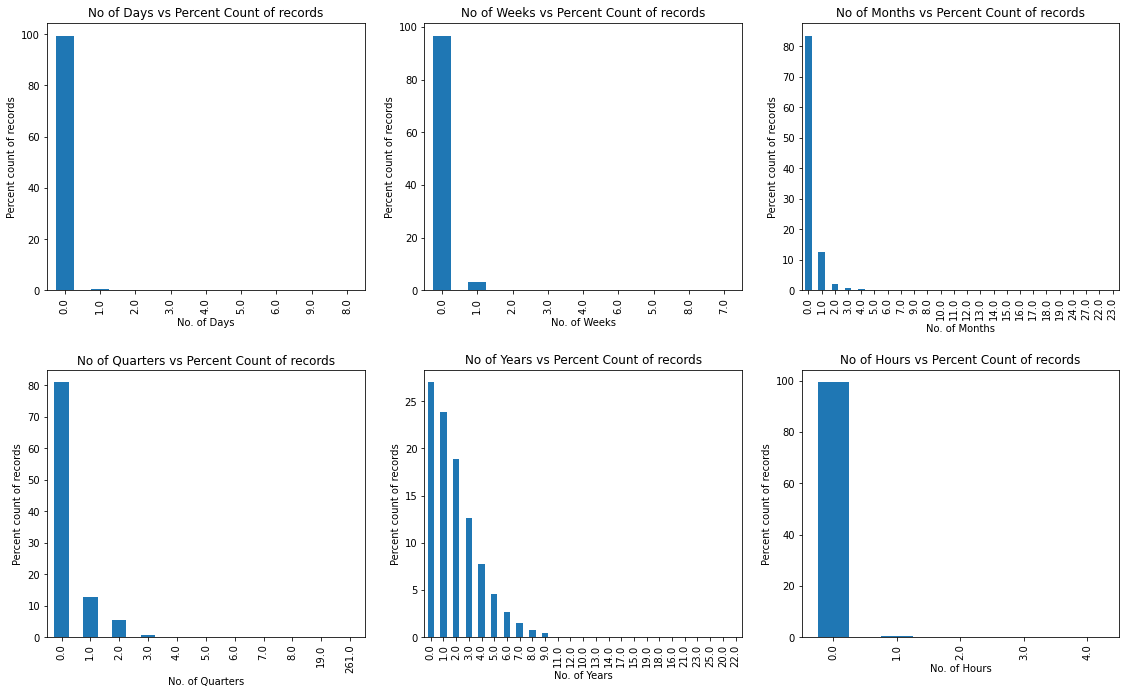

In [162]:
#Lets see the AMT_REQ_CREDIT_BUREAU_* columns

plt.figure(figsize=[16,10],)

plt.subplot(2,3,1) 
tmp_df = data_app.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)*100
tmp_df.plot.bar().set(xlabel= 'No. of Days', ylabel='Percent count of records',title='No of Days vs Percent Count of records')

plt.subplot(2,3,2) 
tmp_df1 = data_app.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(normalize=True)*100
tmp_df1.plot.bar().set(xlabel= 'No. of Weeks', ylabel='Percent count of records',title='No of Weeks vs Percent Count of records')

plt.subplot(2,3,3) 
tmp_df2 = data_app.AMT_REQ_CREDIT_BUREAU_MON.value_counts(normalize=True)*100
tmp_df2.plot.bar().set(xlabel= 'No. of Months', ylabel='Percent count of records',title='No of Months vs Percent Count of records')

plt.subplot(2,3,4) 
tmp_df3 = data_app.AMT_REQ_CREDIT_BUREAU_QRT.value_counts(normalize=True)*100
tmp_df3.plot.bar().set(xlabel= 'No. of Quarters', ylabel='Percent count of records',title='No of Quarters vs Percent Count of records')

plt.subplot(2,3,5) 
tmp_df4 = data_app.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(normalize=True)*100
tmp_df4.plot.bar().set(xlabel= 'No. of Years', ylabel='Percent count of records',title='No of Years vs Percent Count of records')

plt.subplot(2,3,6) 
tmp_df5 = data_app.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)*100
tmp_df5.plot.bar().set(xlabel= 'No. of Hours', ylabel='Percent count of records',title='No of Hours vs Percent Count of records')
plt.tight_layout(pad=2.0)
plt.show()


As 99% of the values in AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_QRT columns are 0, hence it is safe to impute missing values with 0

For AMT_REQ_CREDIT_BUREAU_YEAR column we can impute missing values with the median number of years

In [186]:
data_app.fillna({'AMT_REQ_CREDIT_BUREAU_HOUR':0,
 'AMT_REQ_CREDIT_BUREAU_DAY':0,
 'AMT_REQ_CREDIT_BUREAU_WEEK':0,
 'AMT_REQ_CREDIT_BUREAU_MON':0,
 'AMT_REQ_CREDIT_BUREAU_QRT':0,
 'AMT_REQ_CREDIT_BUREAU_YEAR':data_app.AMT_REQ_CREDIT_BUREAU_YEAR.median},inplace=True,)

In [187]:
data_app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 